<a href="https://colab.research.google.com/github/ShivaniR-portfolio/Codsoft/blob/main/Task_3_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Importing dataset

In [22]:
data=pd.read_csv("/content/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Data cleaning

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [24]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Data visualization

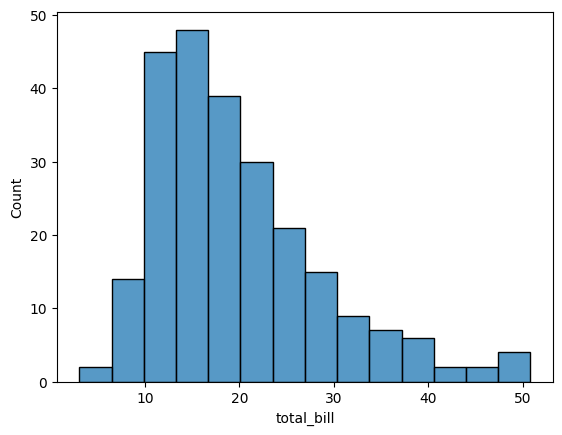

In [25]:

df = sns.load_dataset("tips")  # This dataset should have 'total_bill'
sns.histplot(df['total_bill'])
plt.show()

Total tip by gender

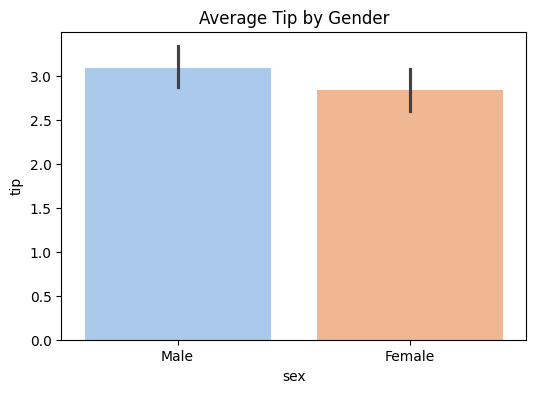

In [26]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='tip', data=df,hue = 'sex', palette="pastel")
plt.title("Average Tip by Gender")
plt.show()

Total bill by day

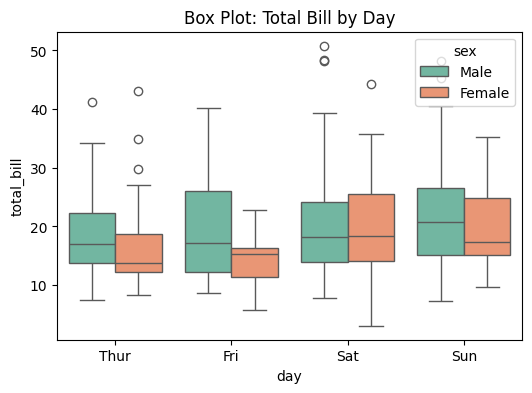

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='day', y='total_bill', data=df,hue = 'sex', palette="Set2")
plt.title("Box Plot: Total Bill by Day")
plt.show()

Total bill vs Tip

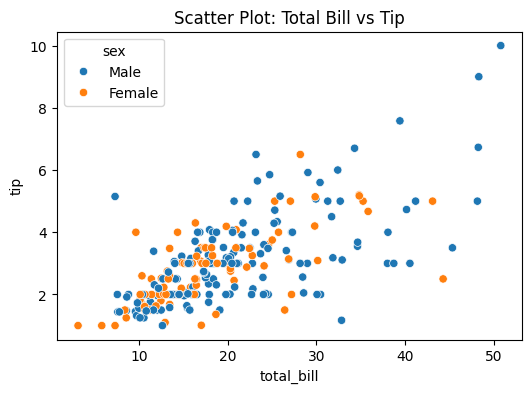

In [28]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title("Scatter Plot: Total Bill vs Tip")
plt.show()

Line plot : Tip amount

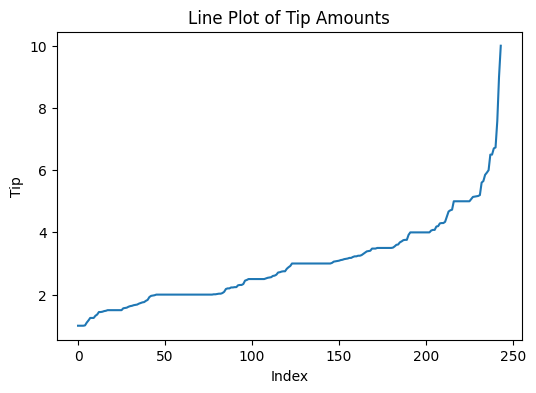

In [29]:
plt.figure(figsize=(6, 4))
sorted_tips = df.sort_values('tip')['tip'].reset_index(drop=True)
sns.lineplot(data=sorted_tips)
plt.title("Line Plot of Tip Amounts")
plt.ylabel("Tip")
plt.xlabel("Index")
plt.show()

Heat map : Correlation matrix

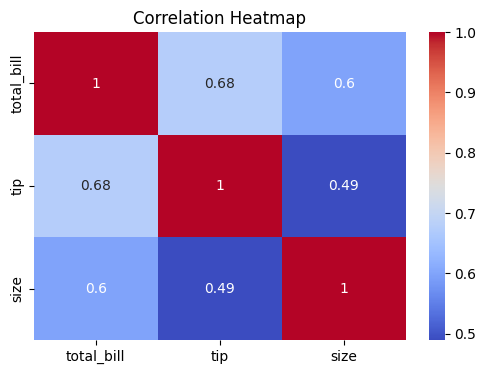

In [30]:
plt.figure(figsize=(6, 4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Pie chart : Distribution of days

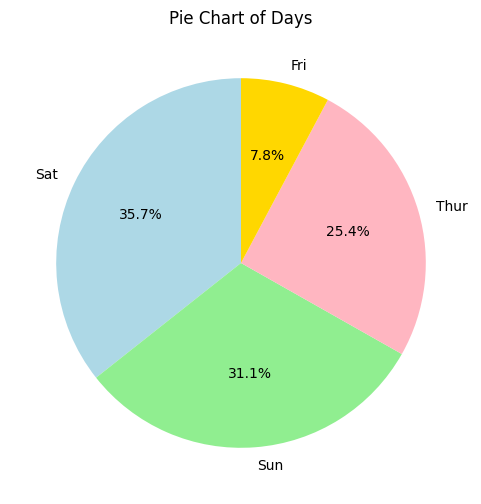

In [31]:
plt.figure(figsize=(6, 6))
df['day'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=['lightblue','lightgreen','lightpink','gold'])
plt.title("Pie Chart of Days")
plt.ylabel("")  # Remove y-axis label
plt.show()

Split data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature and target
X = df[['total_bill', 'size']]  # use available numeric columns
y = df['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train model

In [33]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate

In [34]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.4811084097989491
Mean Squared Error: 0.6485996190543516
